In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
sns.set_context('notebook',font_scale=1.5)

In [4]:
import kid_readout.analysis.archive

no data directory set up for clouds defaulting to /data
updated file list


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
import glob
fns = glob.glob('/artemis/readout/pkl/2016-01-3*.pkl')
fns += glob.glob('/artemis/readout/pkl/2016-02*.pkl')
fns.sort()

In [6]:
df = kid_readout.analysis.archive.build_simple_archive(fns)

In [7]:
df.shape

(8448, 90)

In [8]:
df['day'] = (df.sweep_epoch -df.sweep_epoch.min())/86400.

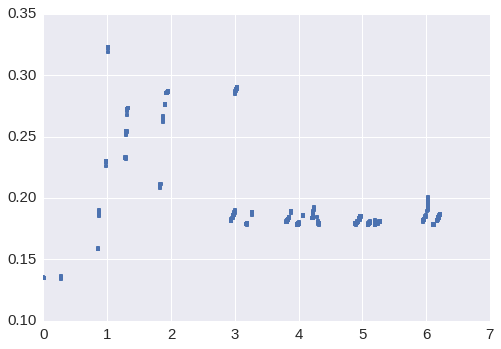

In [9]:
plot(df.day,df.sweep_primary_package_temperature,'.')

In [10]:
bins = np.arange(df.sweep_primary_package_temperature.min(),df.sweep_primary_package_temperature.max()+0.01,0.01)
df['round_temp'] = np.array([bins[x] for x in np.digitize(df.sweep_primary_package_temperature,bins)])

In [11]:
df['sppt'] = df.sweep_primary_package_temperature

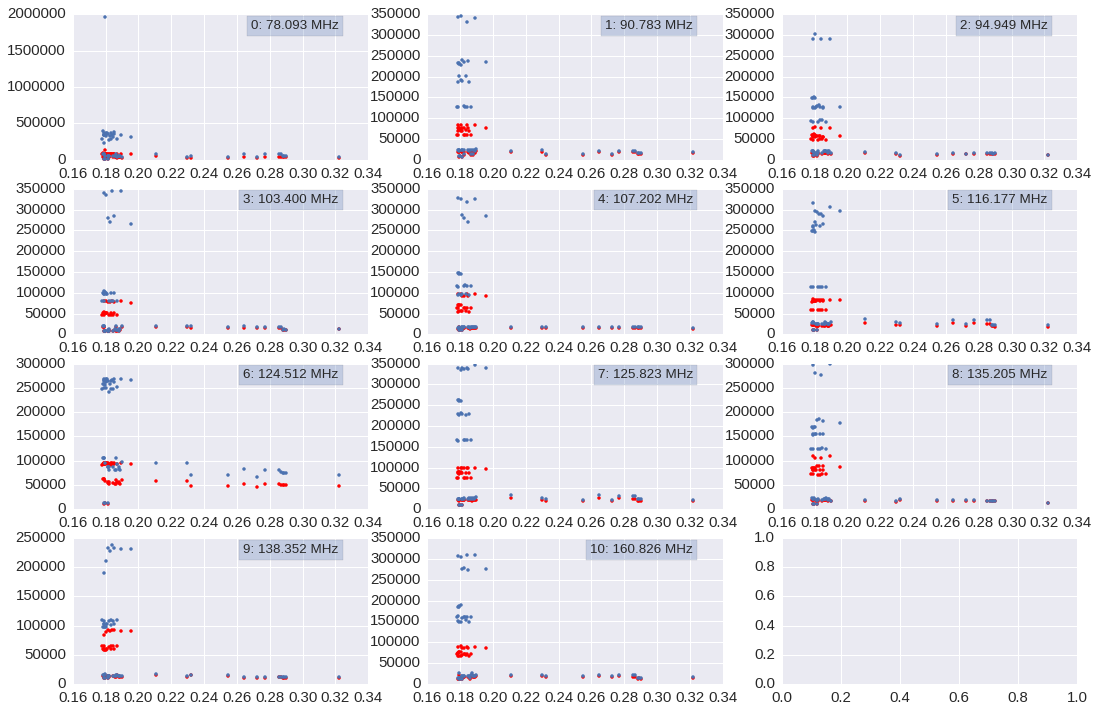

In [12]:
fig,axs = subplots(4,3,figsize=(18,12))
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==26.)]
    ax.plot(r0.sweep_primary_package_temperature,r0.Q,'r.')
    ax.plot(r0.sweep_primary_package_temperature,r0.Q_i,'.')
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')


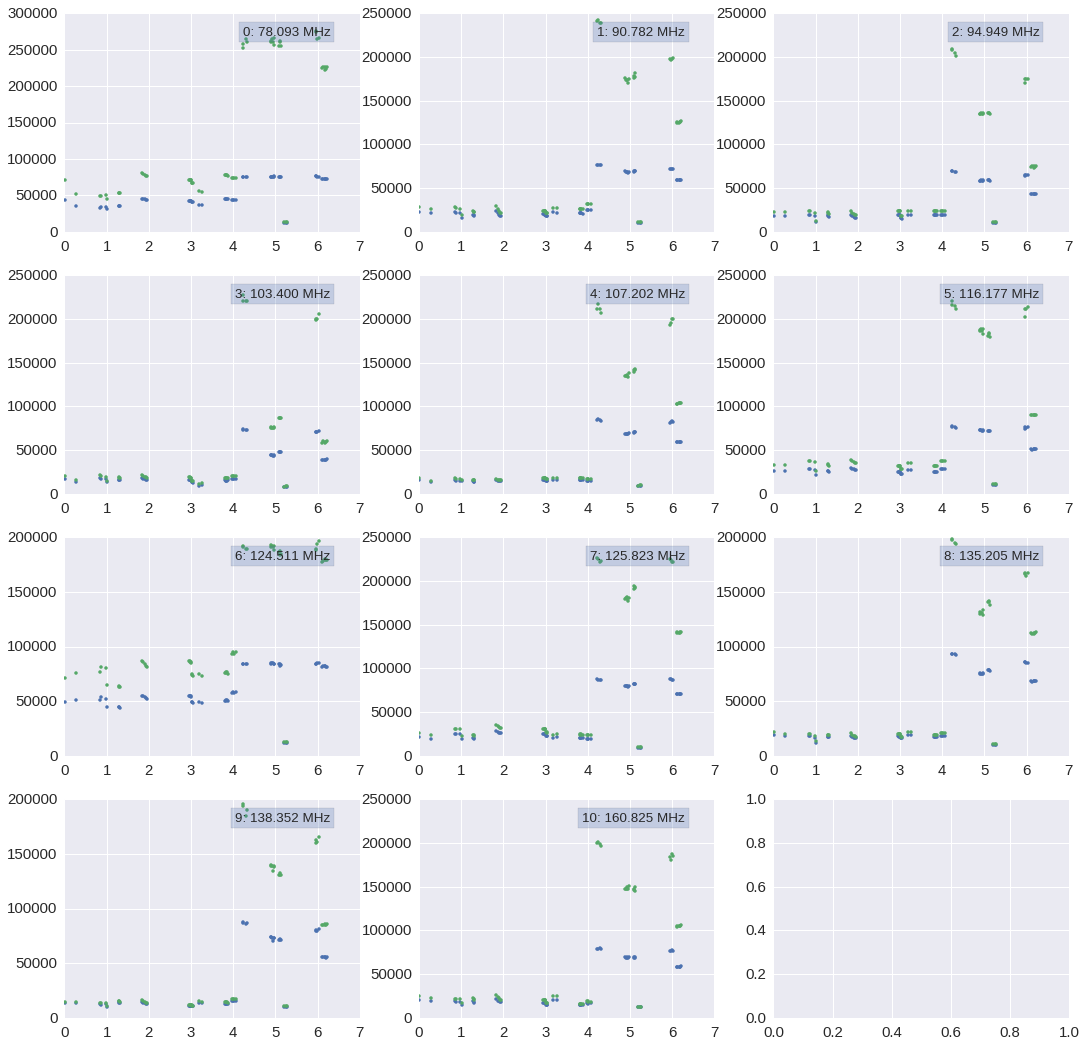

In [13]:
fig,axs = subplots(4,3,figsize=(18,18))
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==33.)]
    ax.plot(r0.day,r0.Q,'.')
    ax.plot(r0.day,r0.Q_i,'.')
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    

(5.1, 5.3)

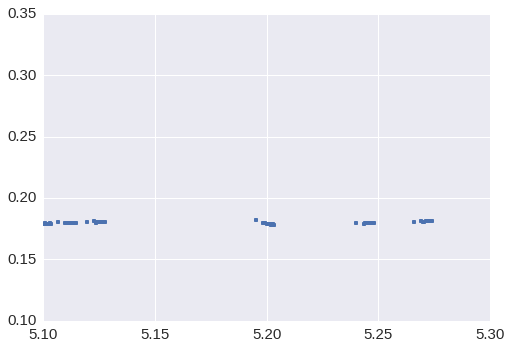

In [45]:
plot(df.day,df.sweep_primary_package_temperature,'.')
xlim(5.1,5.3)

In [46]:
experiments = [[(0,4.2), "Baseline",'k'],
              [(4.2,4.5), "Cancelling magnet", 'r'],
              [(4.5,5.15), "Full warm shield", 'b'],
              [(5.15,5.6), "Reversed magnet", 'gray'],
              [(5.6,6.1), "Cancelling magnet 2", 'orange'],
              [(6.1,6.3), "Simple warm shield", 'cyan']]

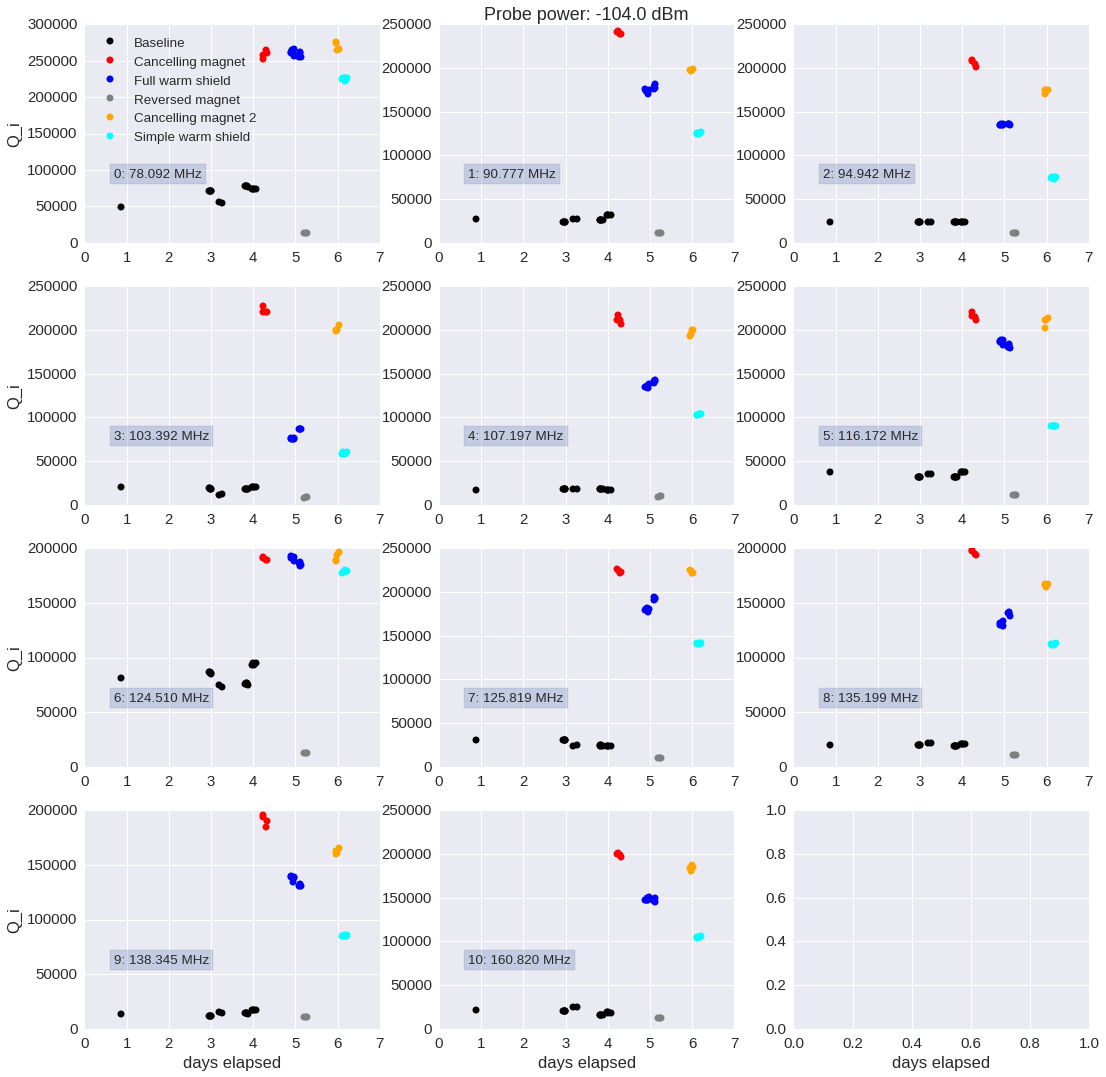

In [57]:
fig,axs = subplots(4,3,figsize=(18,18))
for k in range(11):
    for (start_day,end_day), label, color in experiments:
        ax = axs.flatten()[k]
        r0 = df[(df.resonator_id==k) & (df.atten==33.) & (np.abs(df.sweep_primary_package_temperature-0.185) <0.01)]
        r0 = r0[(r0.day > start_day) & (r0.day < end_day)]
        #ax.plot(r0.day,r0.Q,'.')
        ax.plot(r0.day,r0.Q_i,'o',color=color,label=label)
    ax.text(0.1,0.3,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='left')
axs[0,0].legend(loc='upper left',prop=dict(size='small'))
axs[0,1].set_title('Probe power: %.1f dBm' % r0.power_dbm.iloc[0])
for ax in axs[:,0]:
    ax.set_ylabel('Q_i')
for ax in axs[-1,:]:
    ax.set_xlabel('days elapsed')

In [15]:
plt.cm.RdBu(1)

(0.41545560021026462, 0.0036908881921394196, 0.12341407189766566, 1.0)

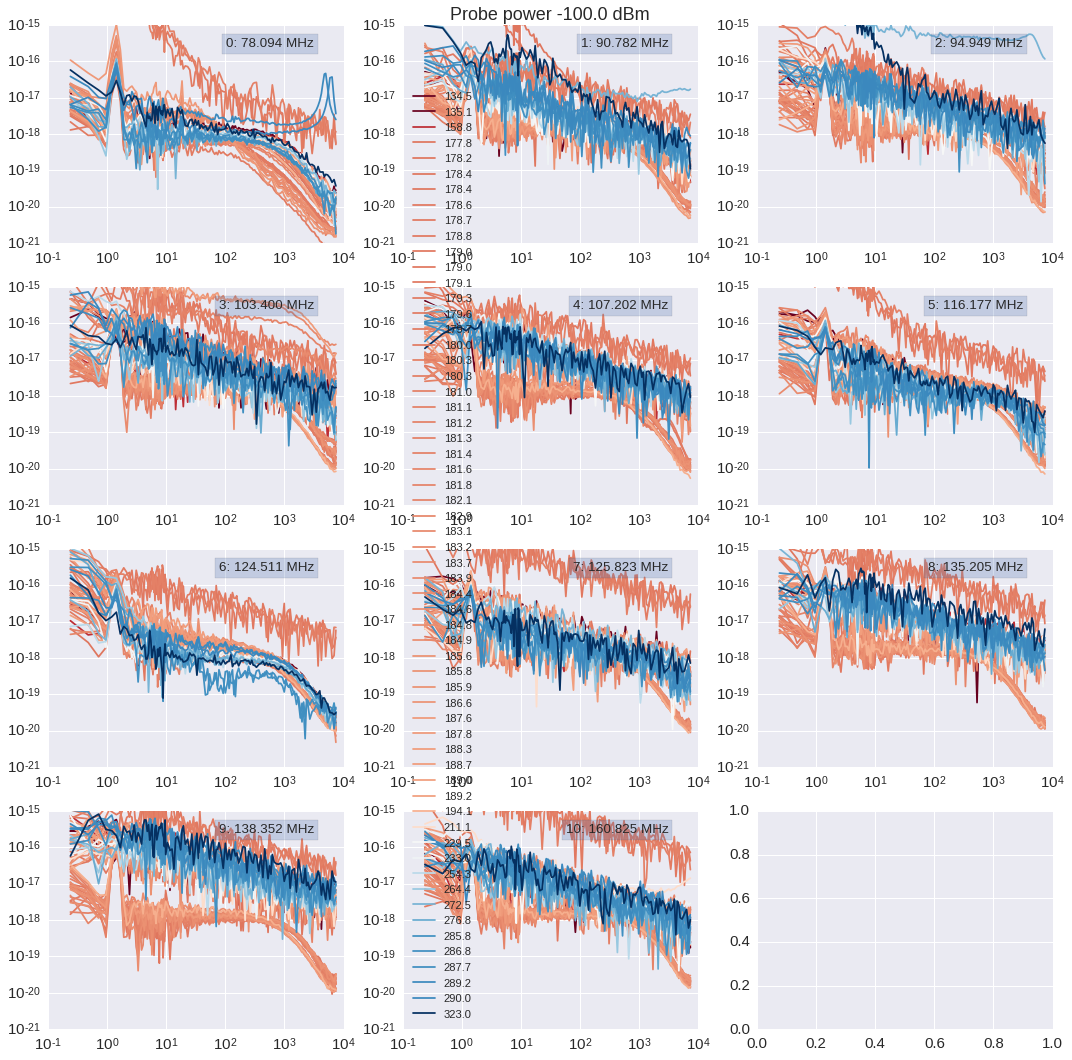

In [16]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==29.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    for m,row in r0.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:], color =plt.cm.RdBu(norm(row.sweep_primary_package_temperature)),label=('%.1f' % (row.sweep_primary_package_temperature*1000)))
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    ax.set_ylim(1e-21,1e-15)
    if k ==10:
        ax.legend(loc='lower left',prop=dict(size='x-small'))
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

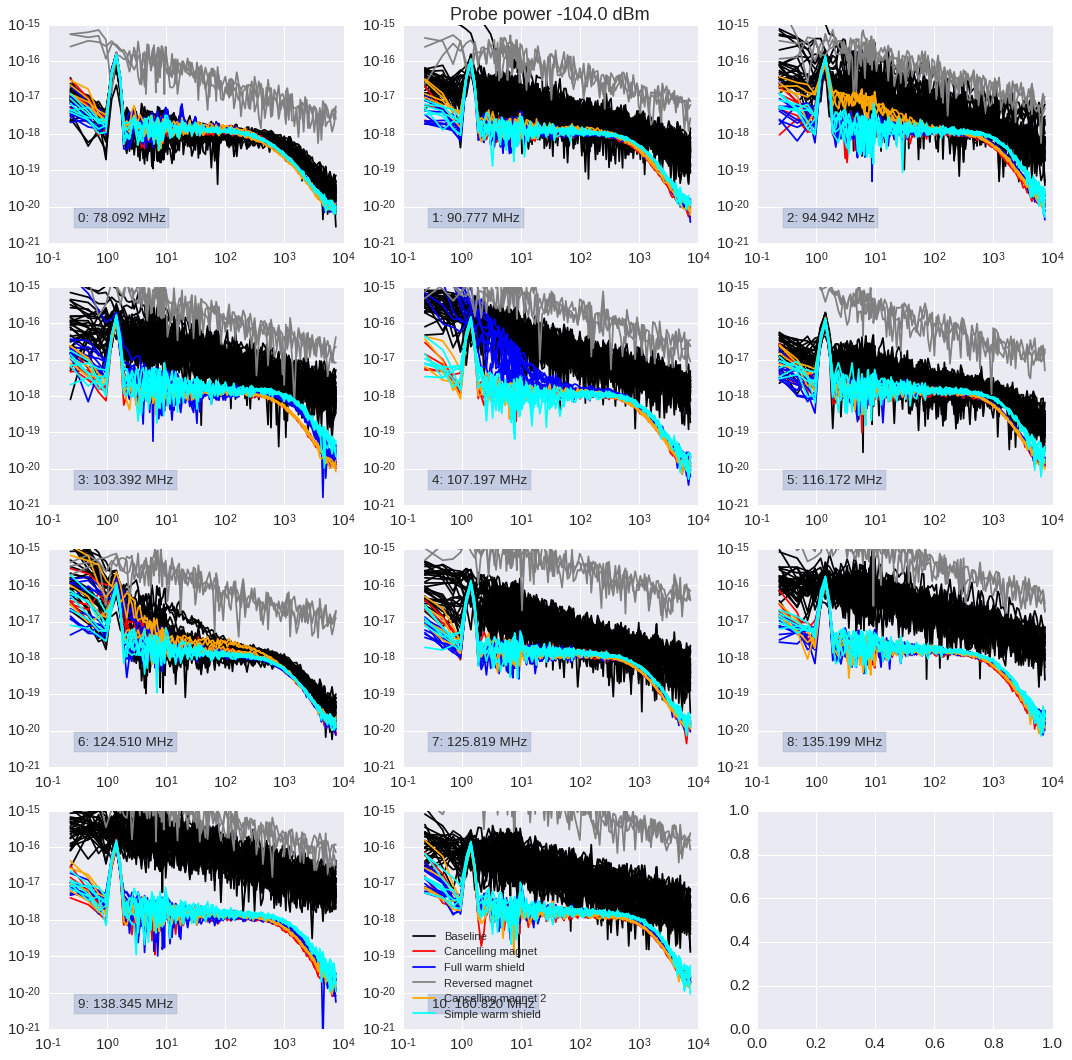

In [49]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    for (start_day,end_day), label, color in experiments:
        r0 = df[(df.resonator_id==k) & (df.atten==33.) & (df.day > start_day) & (df.day < end_day)]
        for m,row in r0.iterrows():
            ax.loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:], color =color,label=label)
            label=None
    ax.text(0.1,0.1,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='left')
    ax.set_ylim(1e-21,1e-15)
    if k ==10:
        ax.legend(loc='lower left',prop=dict(size='x-small'))
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

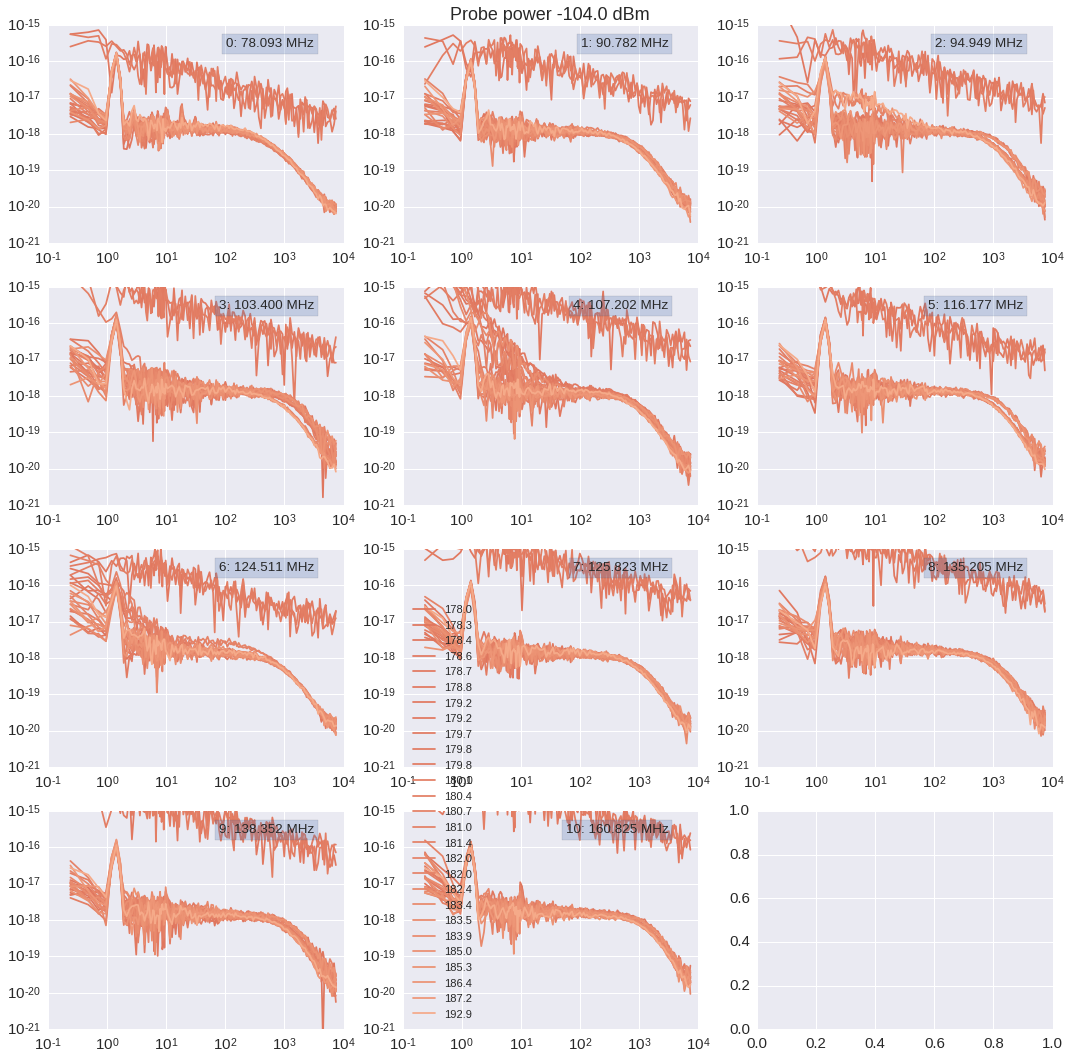

In [17]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==33.) & (df.day > 4.2)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    for m,row in r0.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:], color =plt.cm.RdBu(norm(row.sweep_primary_package_temperature)),label=('%.1f' % (row.sweep_primary_package_temperature*1000)))
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    ax.set_ylim(1e-21,1e-15)
    if k ==10:
        ax.legend(loc='lower left',prop=dict(size='x-small'))
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

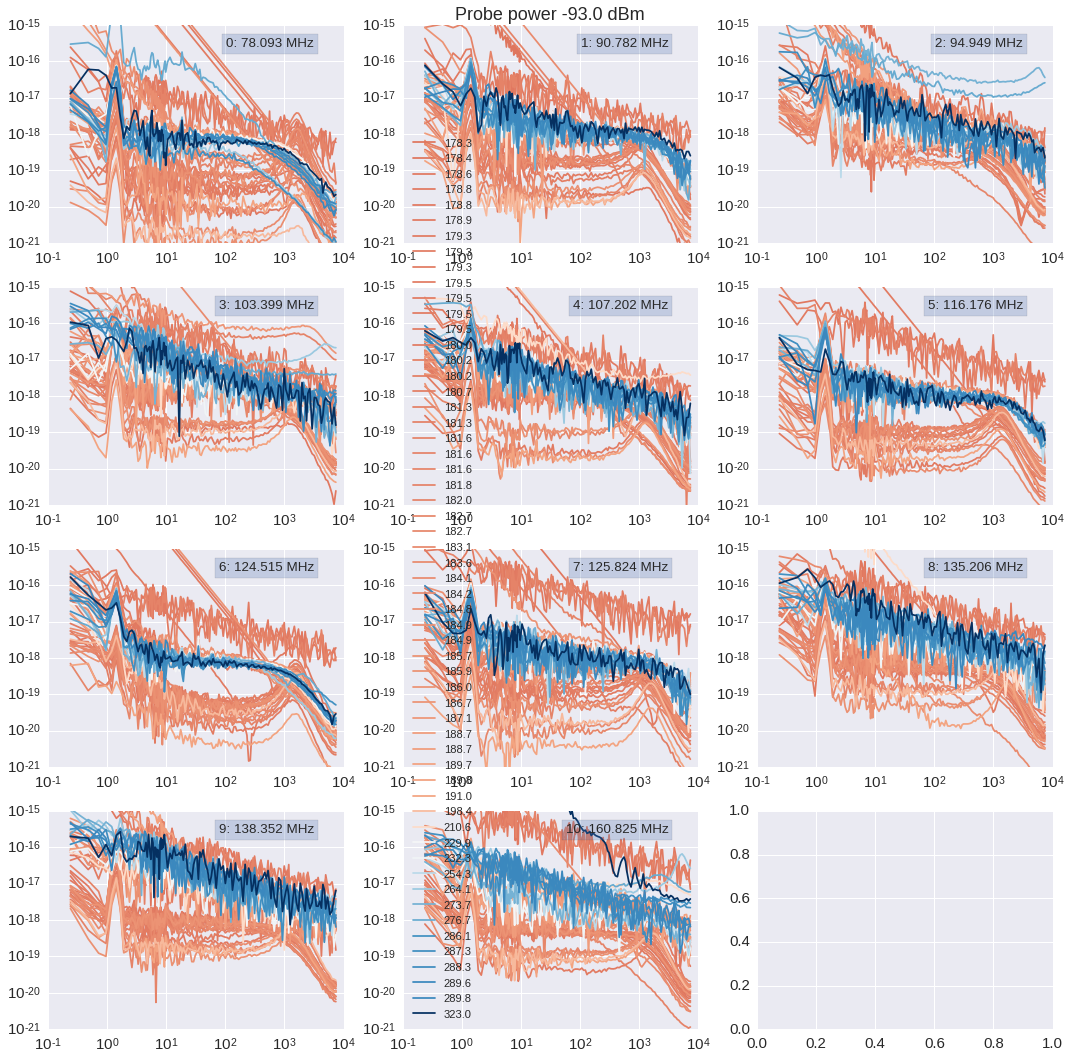

In [18]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==22.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    for m,row in r0.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:]-row.pca_eigvals[0,:], color =plt.cm.RdBu(norm(row.sweep_primary_package_temperature)),label=('%.1f' % (row.sweep_primary_package_temperature*1000)))
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    ax.set_ylim(1e-21,1e-15)
    if k ==10:
        ax.legend(loc='lower left',prop=dict(size='x-small'))
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

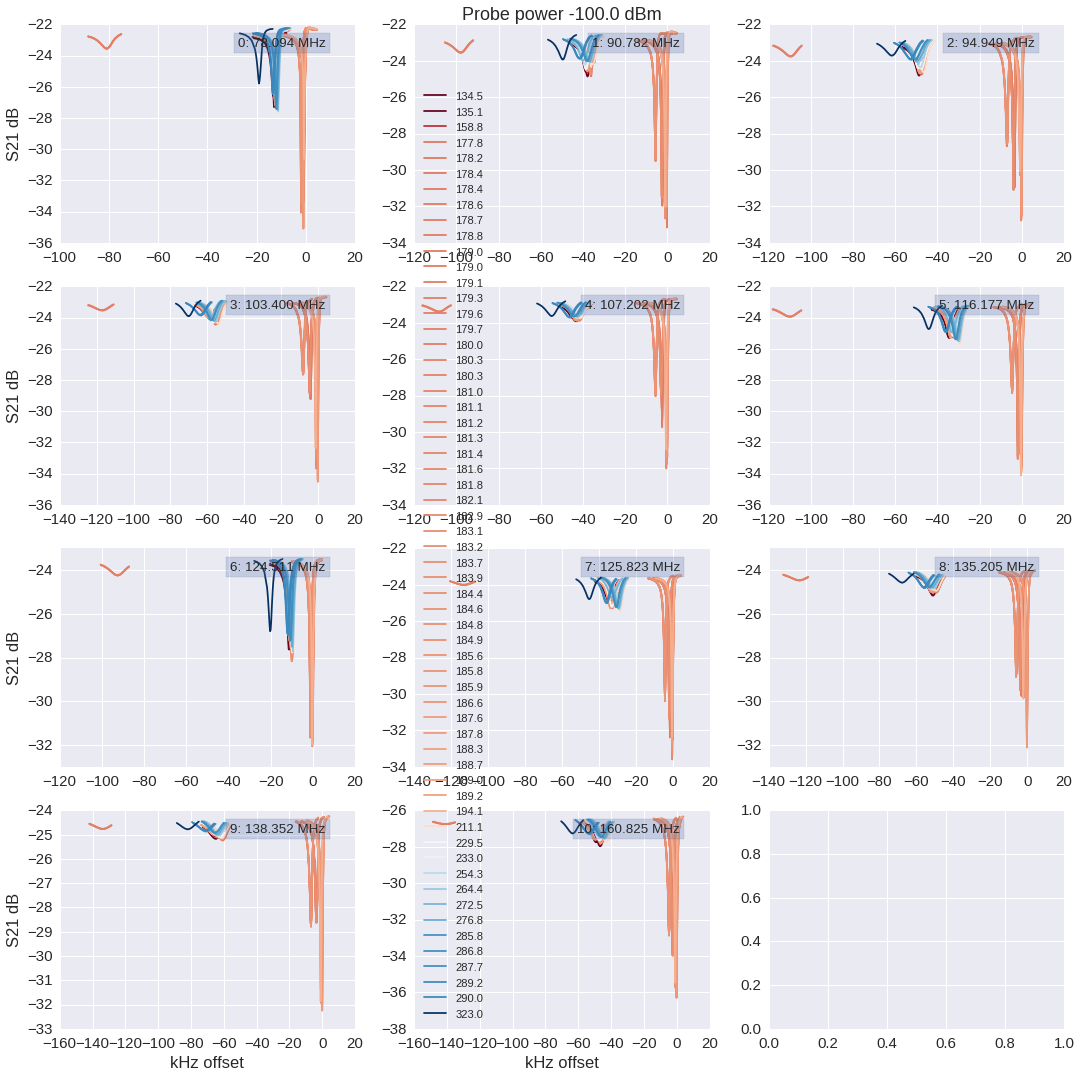

In [19]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==29.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    for m,row in r0.iterrows():
        ax.plot((row.sweep_freqs_MHz-r0.f_0.max())*1000,20*np.log10(np.abs(row.sweep_s21)), color =plt.cm.RdBu(norm(row.sweep_primary_package_temperature)),label=('%.1f' % (row.sweep_primary_package_temperature*1000)))
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
#    ax.set_ylim(1e-21,1e-15)
    if k ==10:
        ax.legend(loc='lower left',prop=dict(size='x-small'))
    if k >=9:
        ax.set_xlabel('kHz offset')
    if k % 3 == 0:
        ax.set_ylabel('S21 dB')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

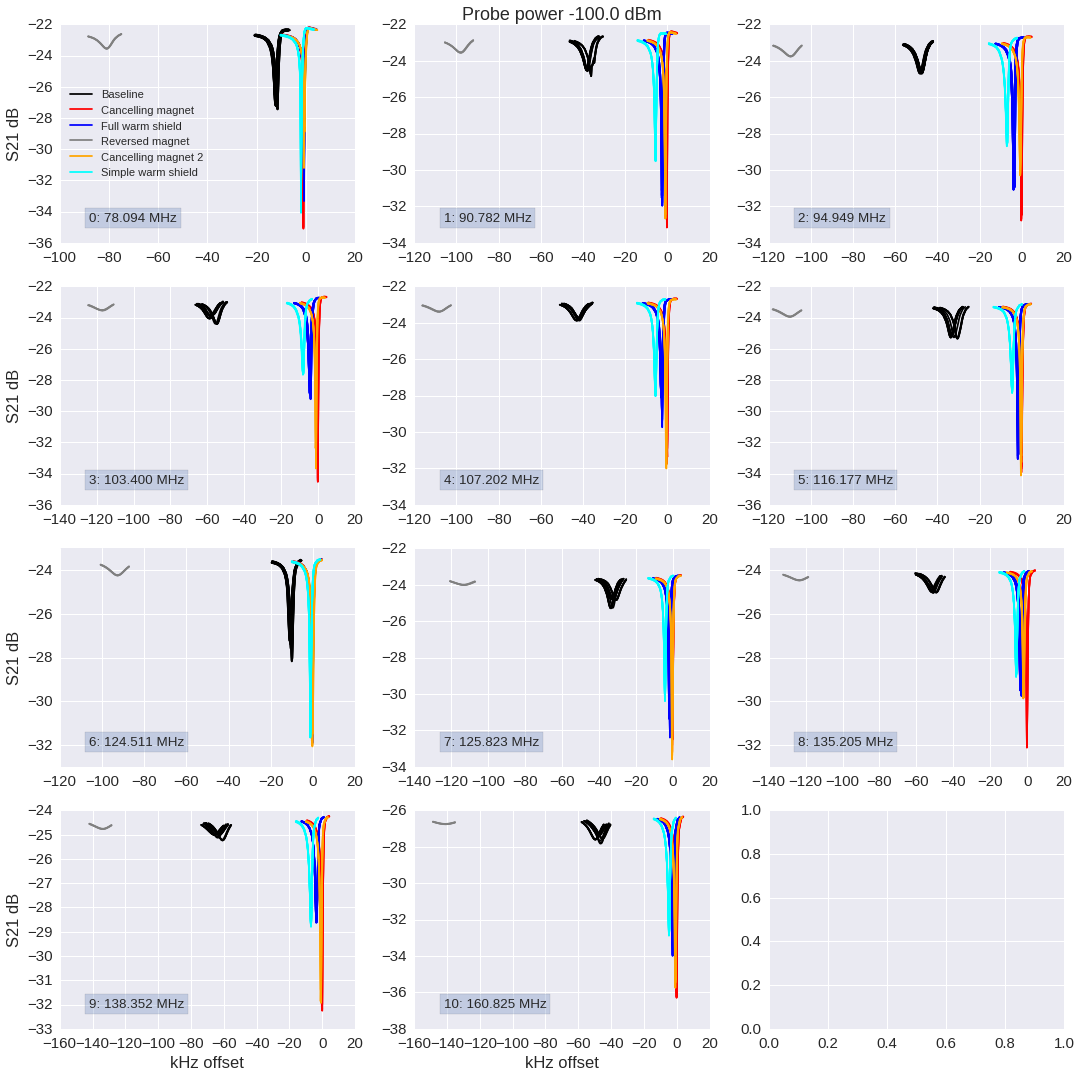

In [52]:
fig,axs = subplots(4,3,figsize=(18,18))

for k in range(11):
    r0 = df[(df.resonator_id==k) & (df.atten==29.) & (np.abs(df.sweep_primary_package_temperature-0.185) <0.01)]
    fmax = r0.f_0.max()
    for (start_day,end_day), label, color in experiments:
        ax = axs.flatten()[k]
        r0 = df[(df.resonator_id==k) & (df.atten==29.) & (np.abs(df.sweep_primary_package_temperature-0.185) <0.01)
               & (df.day > start_day) & (df.day < end_day)]
        for m,row in r0.iterrows():
            ax.plot((row.sweep_freqs_MHz-fmax)*1000,20*np.log10(np.abs(row.sweep_s21)), color =color,label=label)
            label = None
    ax.text(0.1,0.1,('%d: %.3f MHz' % (k,fmax)),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='left')
#    ax.set_ylim(1e-21,1e-15)
    if k ==0:
        ax.legend(loc='center left',prop=dict(size='x-small'))
    if k >=9:
        ax.set_xlabel('kHz offset')
    if k % 3 == 0:
        ax.set_ylabel('S21 dB')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


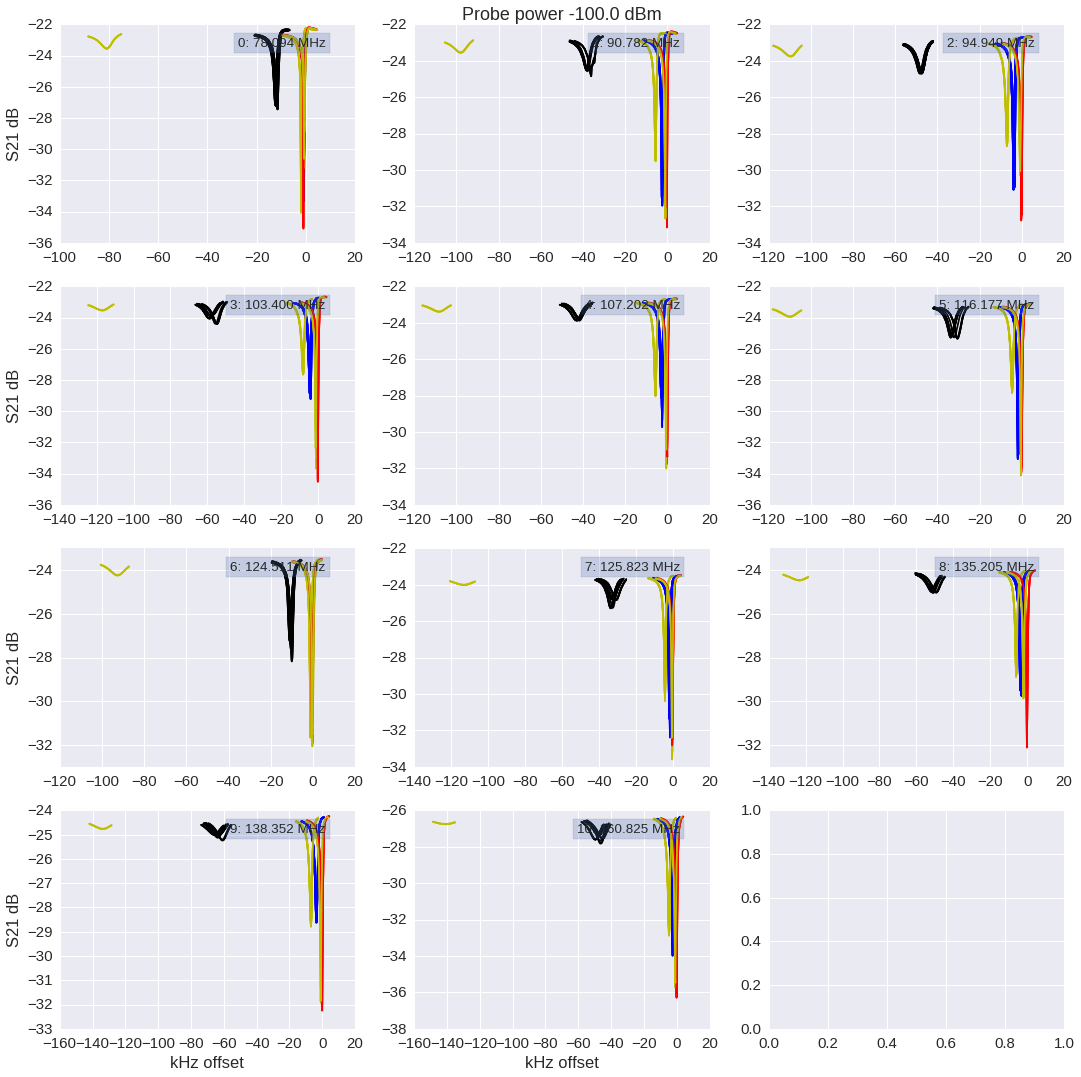

In [20]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==29.) & (np.abs(df.sweep_primary_package_temperature-0.185) <0.01)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    for m,row in r0.iterrows():
        if row.day < 4.2:
            color = 'k'
        elif row.day > 4.5 and row.day < 5.2:
            color = 'b'
        elif row.day > 5.2:
            color = 'y'
        else:
            color = 'r'
        ax.plot((row.sweep_freqs_MHz-r0.f_0.max())*1000,20*np.log10(np.abs(row.sweep_s21)), color =color)
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
#    ax.set_ylim(1e-21,1e-15)
    if k ==10:
        ax.legend(loc='lower left',prop=dict(size='x-small'))
    if k >=9:
        ax.set_xlabel('kHz offset')
    if k % 3 == 0:
        ax.set_ylabel('S21 dB')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

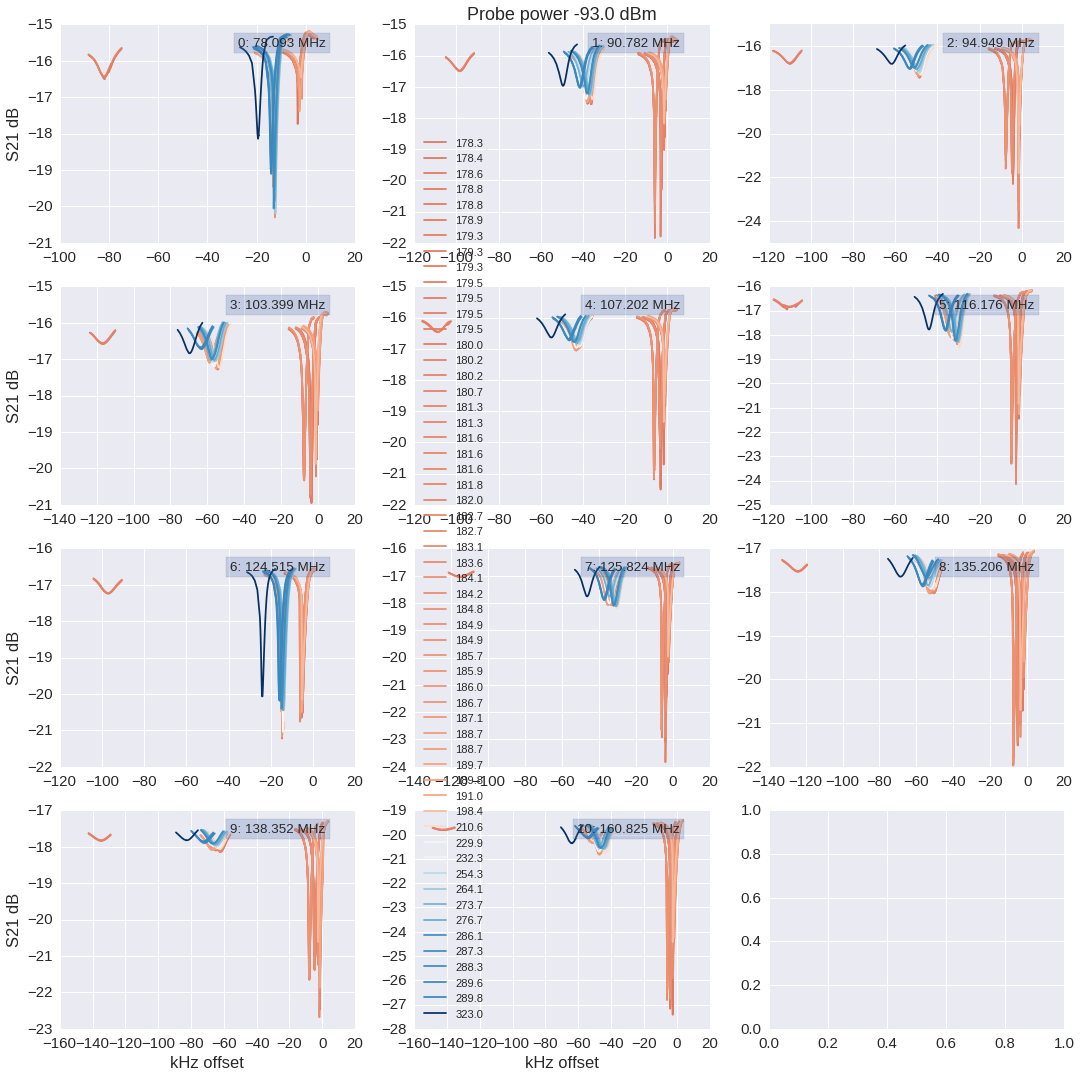

In [21]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==22.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    for m,row in r0.iterrows():
        ax.plot((row.sweep_freqs_MHz-r0.f_0.max())*1000,20*np.log10(np.abs(row.sweep_s21)), color =plt.cm.RdBu(norm(row.sweep_primary_package_temperature)),label=('%.1f' % (row.sweep_primary_package_temperature*1000)))
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
#    ax.set_ylim(1e-21,1e-15)
    if k ==10:
        ax.legend(loc='lower left',prop=dict(size='x-small'))
    if k >=9:
        ax.set_xlabel('kHz offset')
    if k % 3 == 0:
        ax.set_ylabel('S21 dB')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

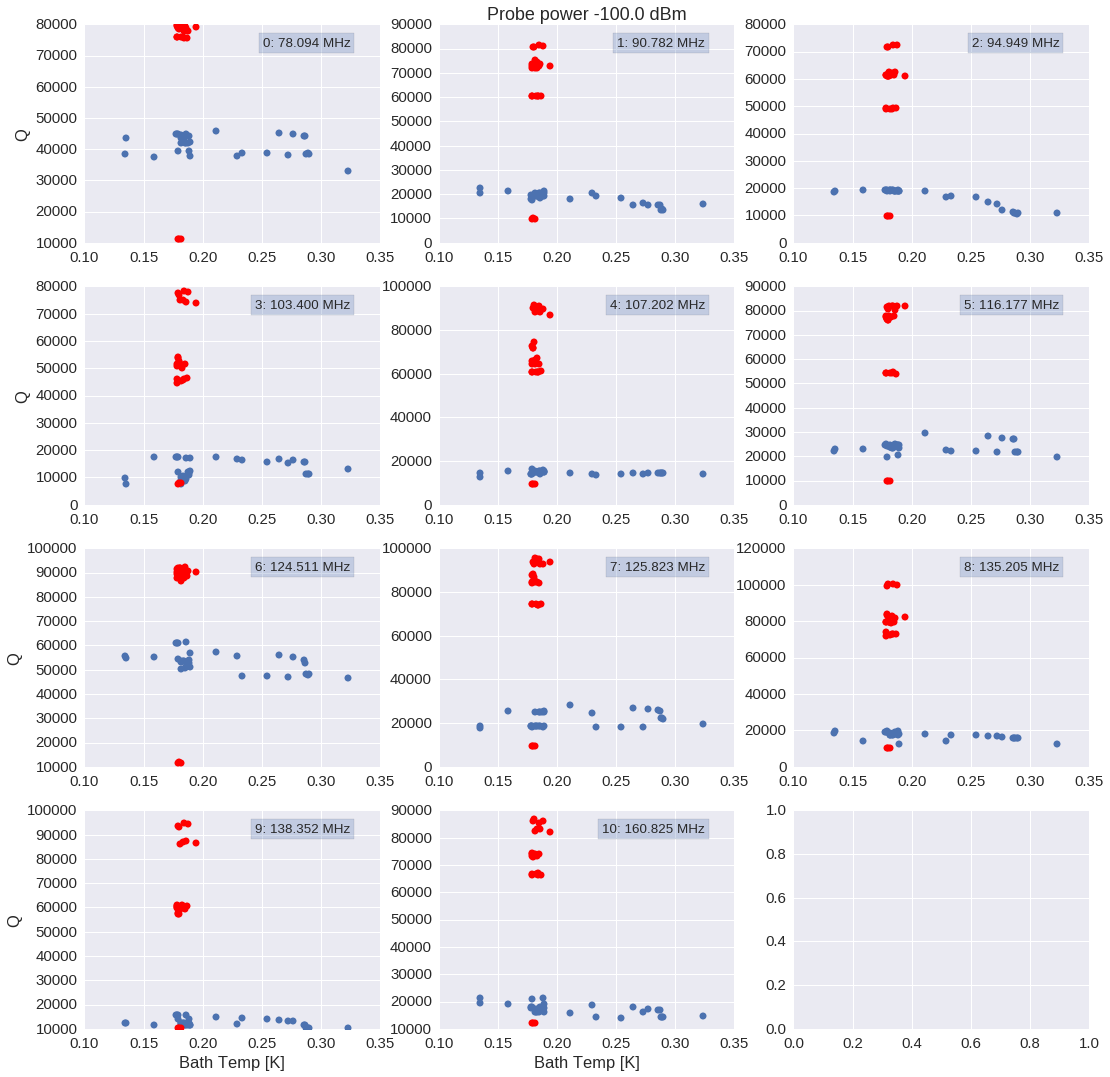

In [22]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==29.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    before = r0[r0.day < 4.2]
    ax.plot(before.sweep_primary_package_temperature,before.Q,'o')
    after = r0[r0.day > 4.2]
    ax.plot(after.sweep_primary_package_temperature,after.Q,'ro')
    
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    #ax.set_ylim(1e-21,1e-15)
    if k >=9:
        ax.set_xlabel('Bath Temp [K]')
    if k % 3 == 0:
        ax.set_ylabel('Q')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

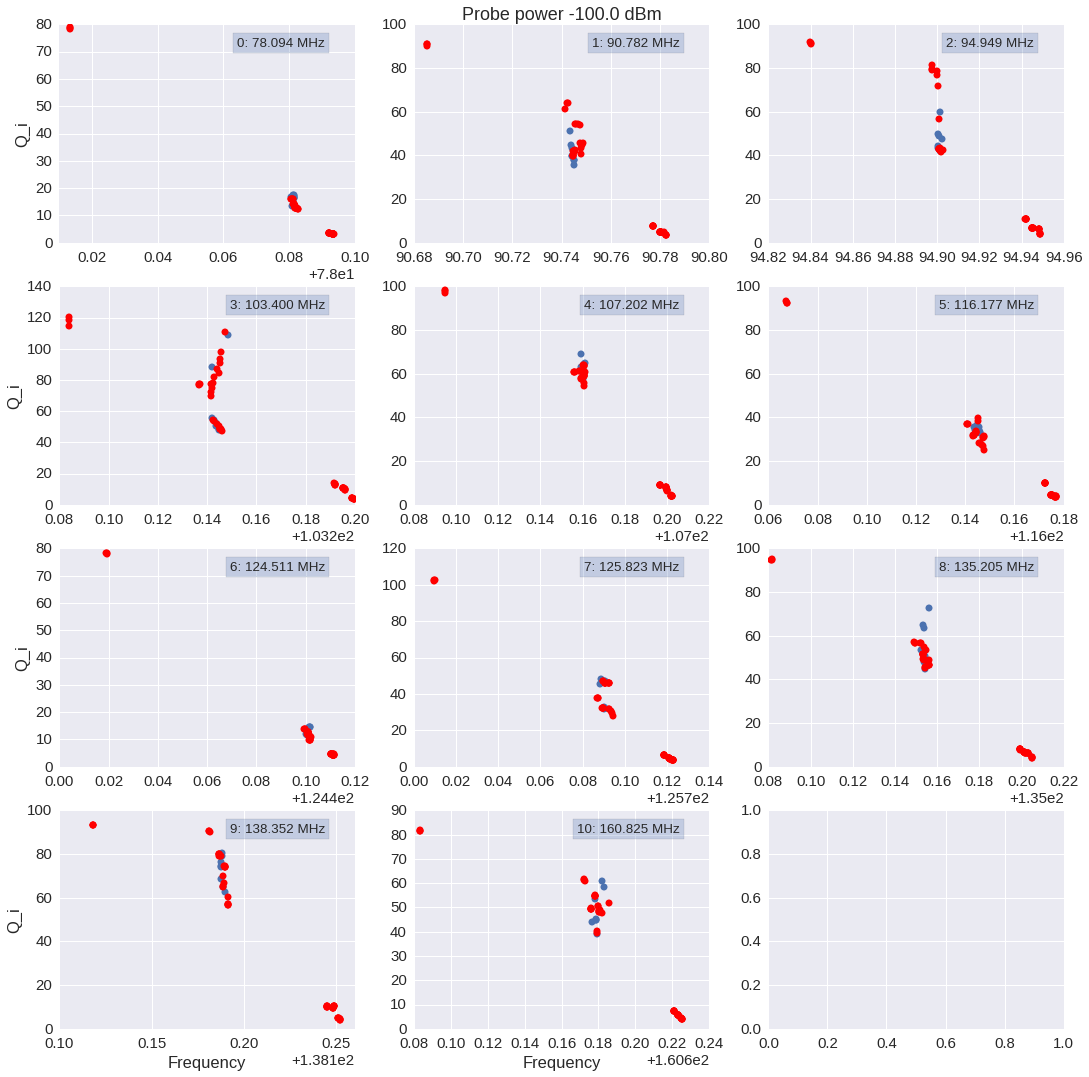

In [23]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==29.) & (df.sweep_primary_package_temperature<.3)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    before = r0[r0.day < 1.5]
    ax.plot(before.f_0,1e6/before.Q_i,'o')
    after = r0[r0.day > 1.5]
    ax.plot(after.f_0,1e6/after.Q_i,'ro')
    
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    #ax.set_ylim(1e-21,1e-15)
    if k >=9:
        ax.set_xlabel('Frequency')
    if k % 3 == 0:
        ax.set_ylabel('Q_i')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

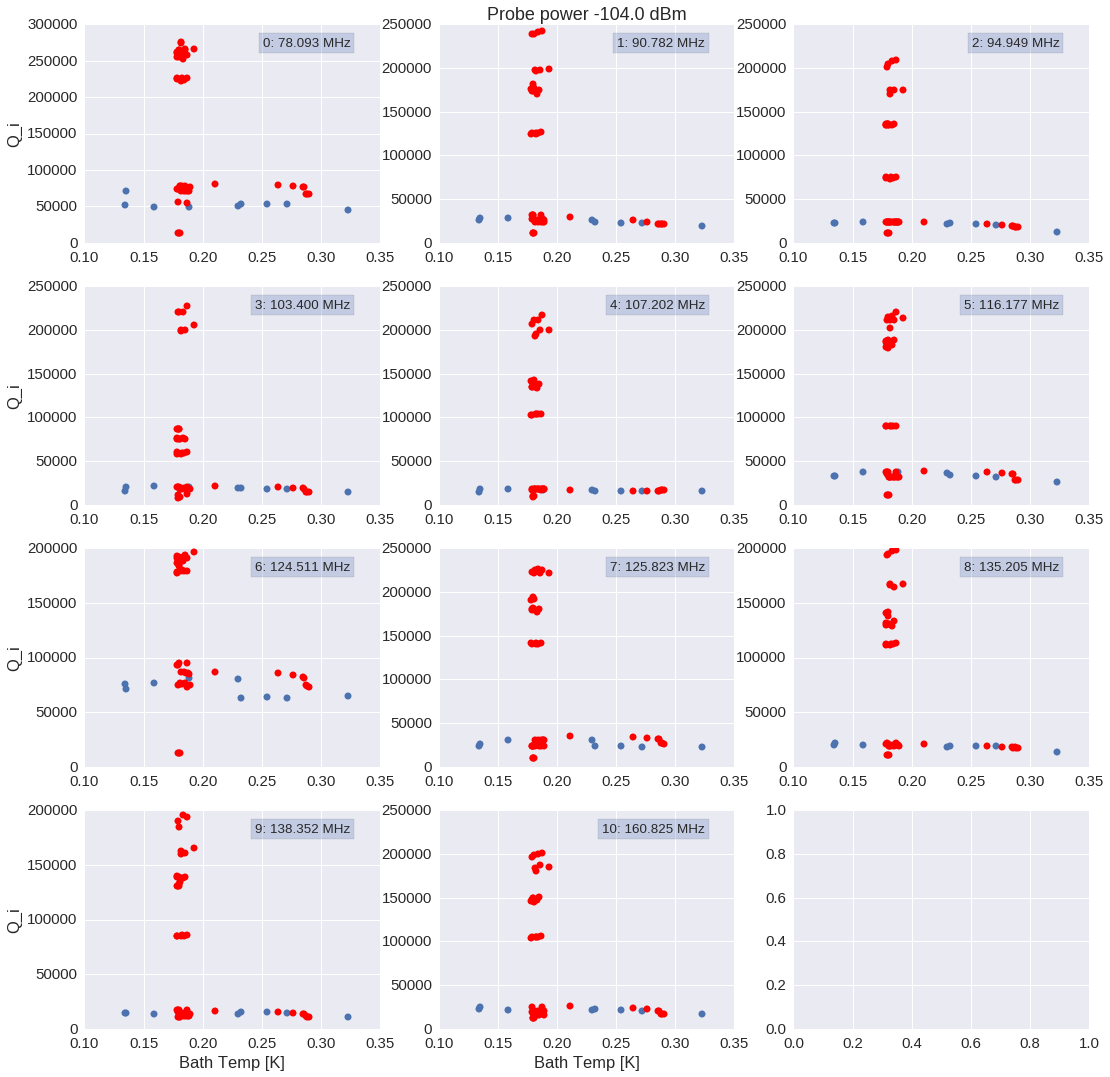

In [24]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==33.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    before = r0[r0.day < 1.5]
    ax.plot(before.sweep_primary_package_temperature,before.Q_i,'o')
    after = r0[r0.day > 1.5]
    ax.plot(after.sweep_primary_package_temperature,after.Q_i,'ro')
    
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    #ax.set_ylim(1e-21,1e-15)
    if k >=9:
        ax.set_xlabel('Bath Temp [K]')
    if k % 3 == 0:
        ax.set_ylabel('Q_i')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

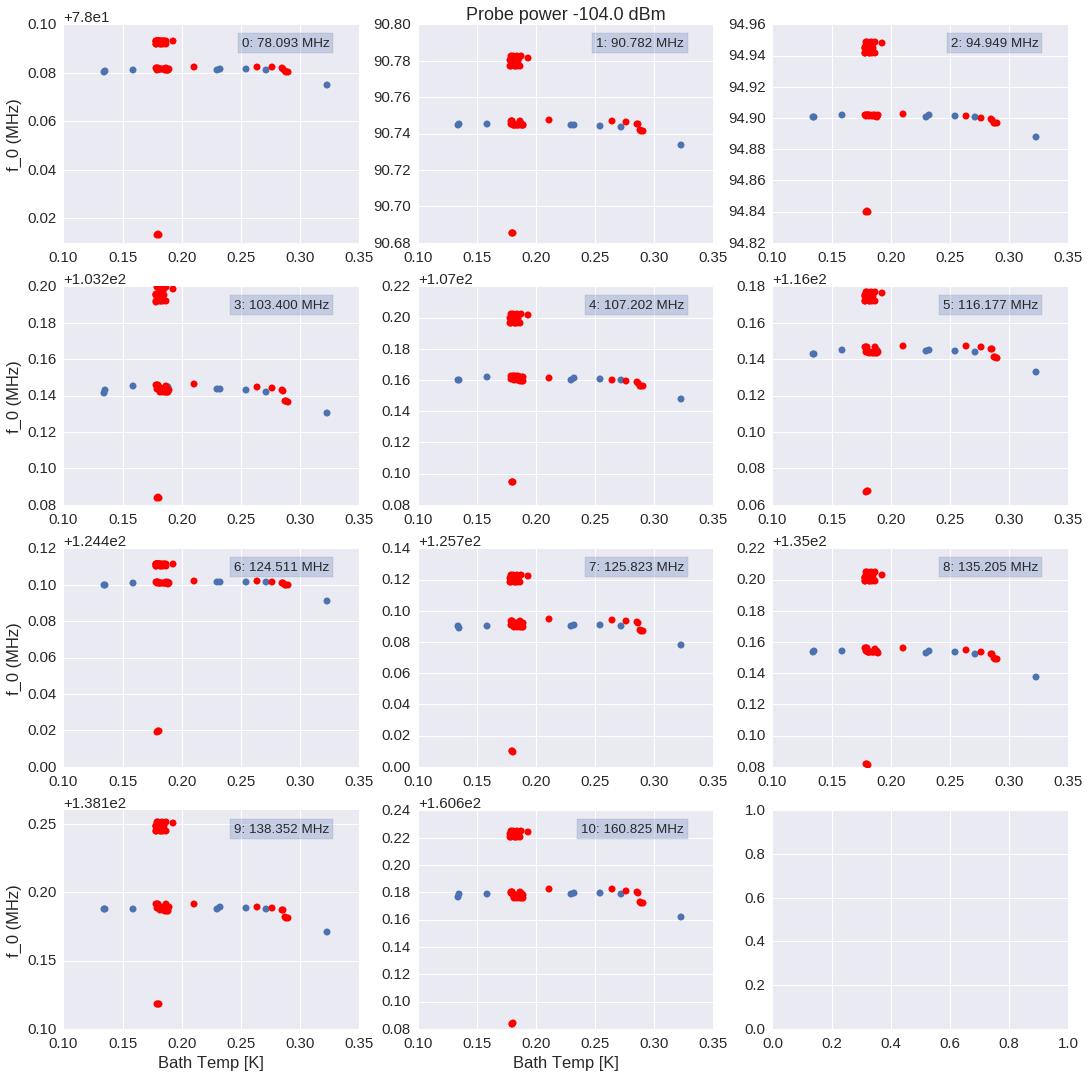

In [25]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==33.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    before = r0[r0.day < 1.5]
    ax.plot(before.sweep_primary_package_temperature,before.f_0,'o')
    after = r0[r0.day > 1.5]
    ax.plot(after.sweep_primary_package_temperature,after.f_0,'ro')
    
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    #ax.set_ylim(1e-21,1e-15)
    if k >=9:
        ax.set_xlabel('Bath Temp [K]')
    if k % 3 == 0:
        ax.set_ylabel('f_0 (MHz)')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

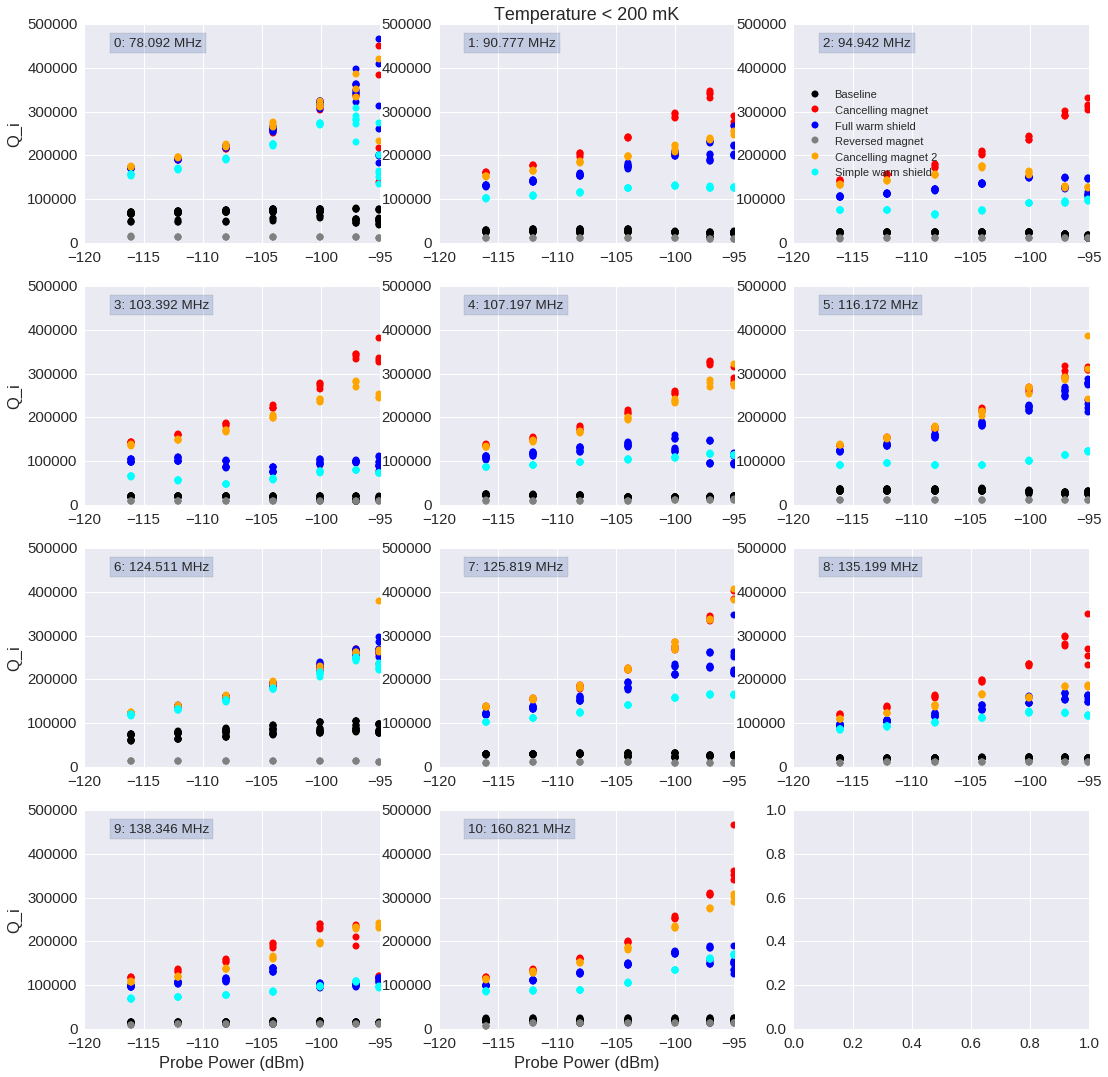

In [55]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.power_dbm.min(),vmax=df.power_dbm.max())
for k in range(11):
    for (start_day,end_day), label, color in experiments:
        r0 = df[(df.resonator_id==k) & (df.atten>22.) & (np.abs(df.sweep_primary_package_temperature-0.185) <0.01)
                   & (df.day > start_day) & (df.day < end_day)]
        ax = axs.flatten()[k]
        ax.plot(r0.power_dbm,r0.Q_i,'o',color=color,label=label)
    
    ax.text(0.1,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='left')
    #ax.set_ylim(1e-21,1e-15)
    ax.set_ylim(0,500e3)
    if k >=9:
        ax.set_xlabel('Probe Power (dBm)')
    if k % 3 == 0:
        ax.set_ylabel('Q_i')
axs[0,1].set_title('Temperature < 200 mK')
axs[0,2].legend(loc='center left',prop=dict(size='x-small'))

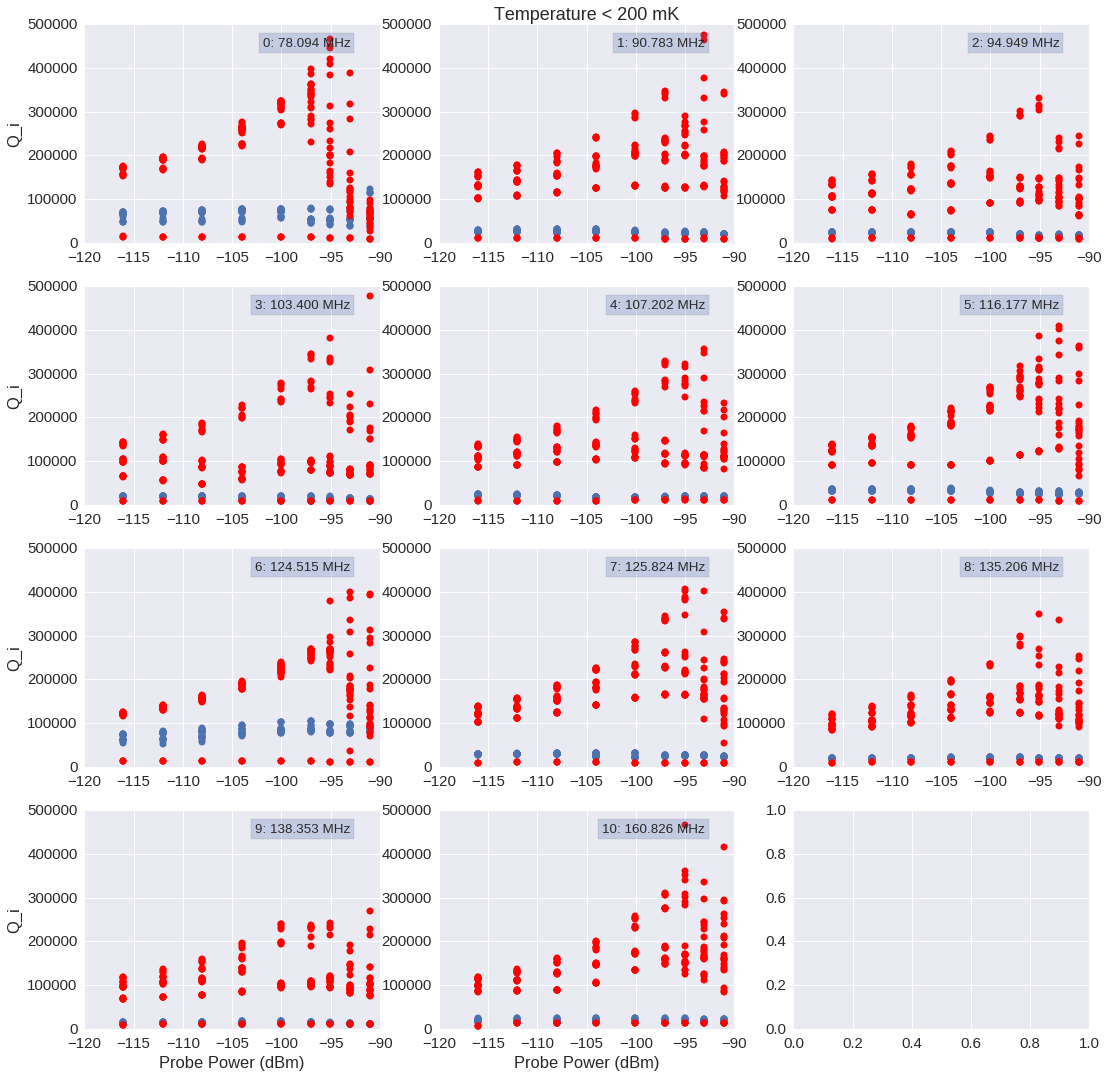

In [26]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.power_dbm.min(),vmax=df.power_dbm.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.sweep_primary_package_temperature<.2)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    before = r0[r0.day < 4.2]
    ax.plot(before.power_dbm,before.Q_i,'o')
    after = r0[r0.day > 4.2]
    ax.plot(after.power_dbm,after.Q_i,'ro')
    
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    #ax.set_ylim(1e-21,1e-15)
    ax.set_ylim(0,500e3)
    if k >=9:
        ax.set_xlabel('Probe Power (dBm)')
    if k % 3 == 0:
        ax.set_ylabel('Q_i')
axs[0,1].set_title('Temperature < 200 mK')

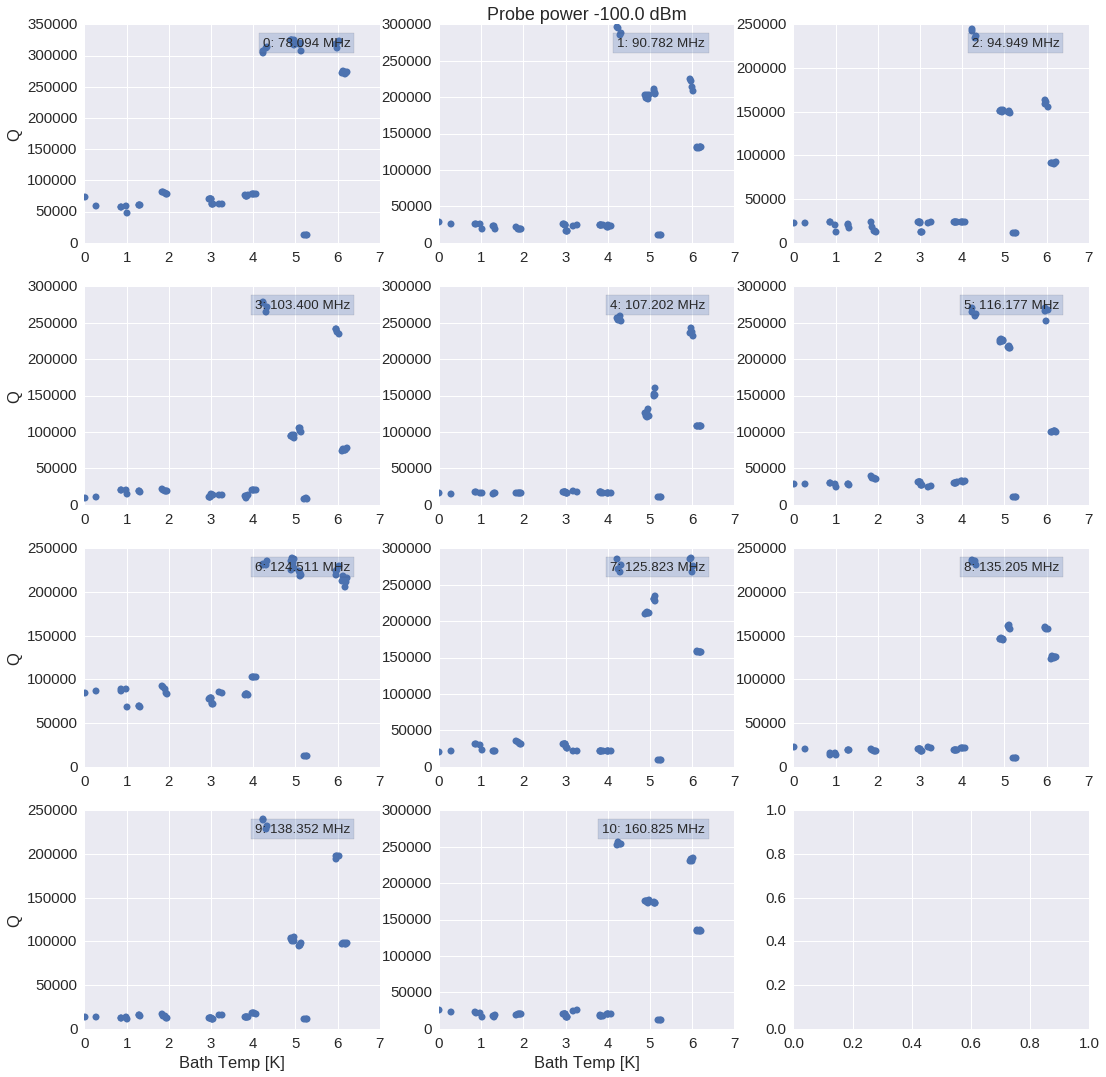

In [27]:
fig,axs = subplots(4,3,figsize=(18,18))
norm = plt.Normalize(vmin=df.sweep_primary_package_temperature.min(),vmax=df.sweep_primary_package_temperature.max())
for k in range(11):
    ax = axs.flatten()[k]
    r0 = df[(df.resonator_id==k) & (df.atten==29.)]
    r0 = r0.sort_values(by=['sweep_primary_package_temperature'])
    ax.plot(r0.day,r0.Q_i,'o')
    ax.text(0.9,0.9,('%d: %.3f MHz' % (k,r0.f_0.max())),transform=ax.transAxes,size='small',bbox=dict(alpha=0.25),ha='right')
    #ax.set_ylim(1e-21,1e-15)
    if k >=9:
        ax.set_xlabel('Bath Temp [K]')
    if k % 3 == 0:
        ax.set_ylabel('Q')
axs[0,1].set_title('Probe power %.1f dBm' % (r0.power_dbm.iloc[0]))

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


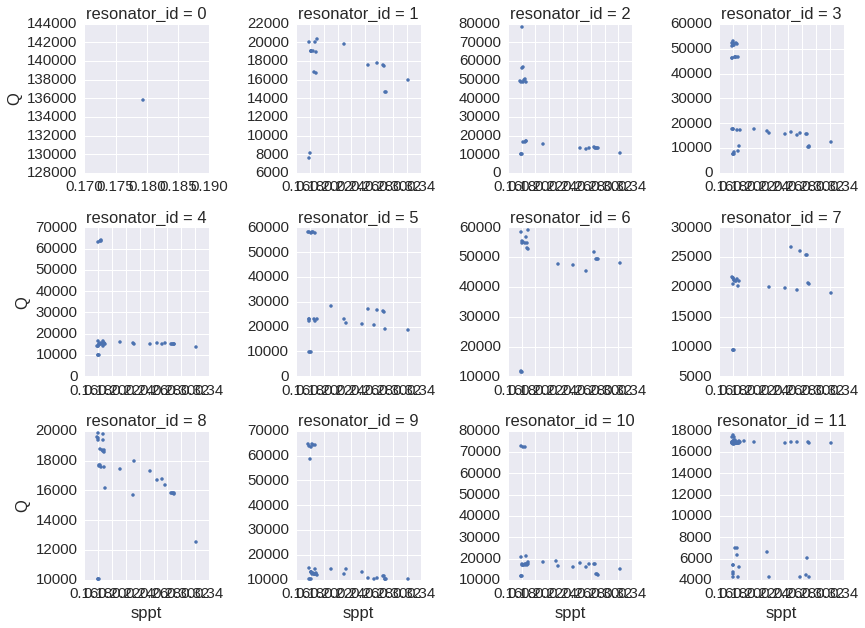

In [28]:
g = sns.FacetGrid(df[df.a.isnull() & (df.atten==26.) & (df.resonator_id < 12)],col='resonator_id',col_wrap=4,sharex=False,sharey=False,col_order=range(12))#,hue='atten',legend_out=True)
g.map(plt.plot,"sppt",'Q',linestyle='',marker='.')
g.add_legend()

In [29]:
import kid_readout.analysis.plot_dataframe

In [ ]:
kid_readout.analysis.plot_dataframe.plot_response?

In [ ]:
blah = np.random.randn(256,256,256)+1j*np.random.randn(256,256,256)

In [ ]:
import scipy.fftpack

In [ ]:
%timeit scipy.fftpack.fftn(blah)

In [ ]:
xx,yy,zz = np.meshgrid(np.linspace(-1,1,256),np.linspace(-1,1,256),np.linspace(-1,1,256))

In [ ]:
xx.shape

In [ ]:
rr2 = (xx**2+yy**2+zz**2)

In [ ]:
amp = (rr2+.01)**-(5/3.)*np.exp(-rr2/1)

In [ ]:
imshow(np.log10(np.fft.fftshift(amp)[:,:,0]))

In [ ]:
fd = amp*blah

In [ ]:
cld = np.fft.ifftn(fd)

In [ ]:
cld.shape

In [ ]:
imshow(np.abs(cld[:,:,1]))

In [ ]:
import pandas as pd

In [ ]:
blah = pd.read_csv('/artemis/readout/SRS/20160128-182943.txt')

In [ ]:
blah.shape

In [ ]:
blah.columns

In [ ]:
plot((blah[' rox 3 res'][:]),'.')
ylim(0,1e-3)

In [ ]:
loglog(blah[' rox 2 temp'],(blah[' rox 3 res'][:]),'.')
ylim(1e-4,1e-3)